In [1]:
import numpy as np
import pandas as pd

In [2]:
# load train data from Kaggle
train_data = pd.read_csv("C:/PythonGIS/dataanalysis/proj/weather_data.csv")

In [3]:
train_data.head(20)

,Location,Date_Time,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh
0,San Diego,2024-01-14 21:12:46,10.683001,41.195754,4.020119,8.233540
1,San Diego,2024-05-17 15:22:10,8.734140,58.319107,9.111623,27.715161
2,San Diego,2024-05-11 09:30:59,11.632436,38.820175,4.607511,28.732951
3,Philadelphia,2024-02-26 17:32:39,-8.628976,54.074474,3.183720,26.367303
4,San Antonio,2024-04-29 13:23:51,39.808213,72.899908,9.598282,29.898622
5,San Diego,2024-01-21 08:54:56,27.341055,49.023236,9.166543,27.473896
6,San Jose,2024-01-13 02:10:54,1.881883,65.742325,0.221709,1.073112
7,New York,2024-01-25 19:04:34,-6.894766,30.804894,8.027624,16.848337
8,New York,2024-03-29 05:20:30,0.963545,38.819158,3.640129,7.989024
9,San Jose,2024-05-18 09:14:02,-1.607088,82.198701,4.101493,25.647282


In [4]:
print(train_data.shape)

(1000000, 6)


In [5]:
# this data contain 1 000 000 rows

In [6]:
train_data.columns


Index(['Location', 'Date_Time', 'Temperature_C', 'Humidity_pct',
       'Precipitation_mm', 'Wind_Speed_kmh'],
      dtype='object')

In [7]:
train_data.isnull().sum()


Location            0
Date_Time           0
Temperature_C       0
Humidity_pct        0
Precipitation_mm    0
Wind_Speed_kmh      0
dtype: int64

In [8]:
# good, this dataset has no missing values

In [9]:
# it needs to change to more suitable format for analysis, so I split date and time and also split date to year, month and day
train_data['Date_Time'] = pd.to_datetime(train_data['Date_Time'])

In [10]:
# New columns of date and time
train_data['Date'] = train_data['Date_Time'].dt.date
train_data['Time'] = train_data['Date_Time'].dt.time

In [11]:
train_data[['Date_Time', 'Date', 'Time']].head(20)


,Date_Time,Date,Time
0,2024-01-14 21:12:46,2024-01-14,21:12:46
1,2024-05-17 15:22:10,2024-05-17,15:22:10
2,2024-05-11 09:30:59,2024-05-11,09:30:59
3,2024-02-26 17:32:39,2024-02-26,17:32:39
4,2024-04-29 13:23:51,2024-04-29,13:23:51
5,2024-01-21 08:54:56,2024-01-21,08:54:56
6,2024-01-13 02:10:54,2024-01-13,02:10:54
7,2024-01-25 19:04:34,2024-01-25,19:04:34
8,2024-03-29 05:20:30,2024-03-29,05:20:30
9,2024-05-18 09:14:02,2024-05-18,09:14:02


In [12]:
train_data = train_data.drop(columns=['Date_Time'])


In [13]:
train_data['Date'] = pd.to_datetime(train_data['Date'])


In [14]:
train_data['Year'] = train_data['Date'].dt.year
train_data['Month'] = train_data['Date'].dt.month
train_data['Day'] = train_data['Date'].dt.day


In [15]:
train_data[['Date', 'Year', 'Month', 'Day']].head()


,Date,Year,Month,Day
0,2024-01-14,2024,1,14
1,2024-05-17,2024,5,17
2,2024-05-11,2024,5,11
3,2024-02-26,2024,2,26
4,2024-04-29,2024,4,29


In [16]:
# here i need to understand, is each location have same time range
train_data.groupby('Location')['Month'].unique()

Location
Chicago         [1, 4, 3, 2, 5]
Dallas          [2, 3, 4, 5, 1]
Houston         [3, 5, 1, 2, 4]
Los Angeles     [2, 1, 5, 4, 3]
New York        [1, 3, 2, 4, 5]
Philadelphia    [2, 3, 4, 5, 1]
Phoenix         [1, 3, 4, 2, 5]
San Antonio     [4, 2, 5, 3, 1]
San Diego       [1, 5, 3, 2, 4]
San Jose        [1, 5, 4, 3, 2]
Name: Month, dtype: object

In [17]:
train_data.groupby('Location')['Year'].unique()

Location
Chicago         [2024]
Dallas          [2024]
Houston         [2024]
Los Angeles     [2024]
New York        [2024]
Philadelphia    [2024]
Phoenix         [2024]
San Antonio     [2024]
San Diego       [2024]
San Jose        [2024]
Name: Year, dtype: object

In [18]:
train_data = train_data.drop(columns=['Date'])

In [19]:
# here I create table per each location to decrase a size

In [24]:
import os

# Folder where you want to save per-location files
out_dir = "C:/PythonGIS/dataanalysis/proj/locations"
os.makedirs(out_dir, exist_ok=True)

locations = train_data['Location'].unique()
print("Locations:", locations)

for loc in locations:
    subset = train_data[train_data['Location'] == loc]
    
    # Safe filename: replace spaces with underscores
    loc_clean = str(loc).replace(" ", "_")
    file_path = os.path.join(out_dir, f"weather_{loc_clean}.csv")
    
    subset.to_csv(file_path, index=False)
    print(f"Saved {subset.shape[0]} rows to {file_path}")


Locations: ['San Diego' 'Philadelphia' 'San Antonio' 'San Jose' 'New York' 'Houston'
 'Dallas' 'Chicago' 'Los Angeles' 'Phoenix']
Saved 99774 rows to C:/PythonGIS/dataanalysis/proj/locations\weather_San_Diego.csv
Saved 100122 rows to C:/PythonGIS/dataanalysis/proj/locations\weather_Philadelphia.csv
Saved 99962 rows to C:/PythonGIS/dataanalysis/proj/locations\weather_San_Antonio.csv
Saved 99863 rows to C:/PythonGIS/dataanalysis/proj/locations\weather_San_Jose.csv
Saved 99972 rows to C:/PythonGIS/dataanalysis/proj/locations\weather_New_York.csv
Saved 100076 rows to C:/PythonGIS/dataanalysis/proj/locations\weather_Houston.csv
Saved 99936 rows to C:/PythonGIS/dataanalysis/proj/locations\weather_Dallas.csv
Saved 100164 rows to C:/PythonGIS/dataanalysis/proj/locations\weather_Chicago.csv
Saved 99922 rows to C:/PythonGIS/dataanalysis/proj/locations\weather_Los_Angeles.csv
Saved 100209 rows to C:/PythonGIS/dataanalysis/proj/locations\weather_Phoenix.csv


In [22]:
# for this project i chose Chicago, New York and Dallas cities from train dataset

In [25]:
train_data_chicago = pd.read_csv("C:/PythonGIS/dataanalysis/proj/locations/weather_Chicago.csv")

In [26]:
print(train_data_chicago.shape)
train_data_chicago.head()

(100164, 9)


,Location,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh,Time,Year,Month,Day
0,Chicago,26.786811,31.513614,0.496024,22.980095,02:59:46,2024,1,6
1,Chicago,17.587820,32.817923,0.128803,0.234146,00:07:29,2024,4,16
2,Chicago,-2.562660,30.356593,2.624328,2.601357,03:12:48,2024,4,1
3,Chicago,7.166150,50.377273,4.669553,11.841165,12:07:38,2024,4,3
4,Chicago,38.386233,74.049712,6.792913,3.292467,13:22:42,2024,4,5


In [27]:
# here it is understood that each city ~100 000 rows

In [28]:
# calculate how many observations per month has Chicago dataset
month_counts = train_data_chicago['Month'].value_counts().sort_index()
print(month_counts)

Month
1    22334
2    20808
3    22405
4    21572
5    13045
Name: count, dtype: int64


In [29]:
# plot this

In [30]:
import matplotlib.pyplot as plt

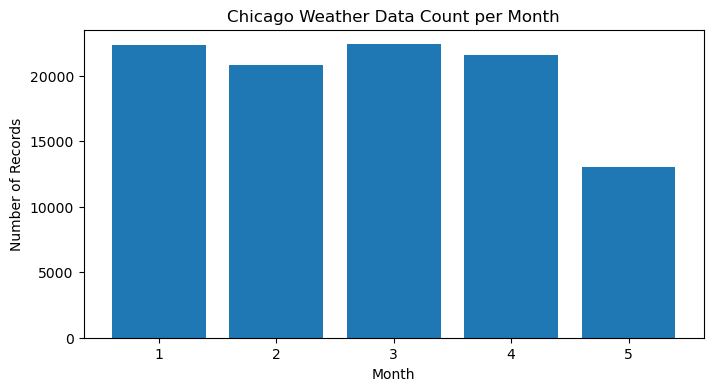

In [31]:
plt.figure(figsize=(8,4))
plt.bar(month_counts.index, month_counts.values)
plt.xlabel("Month")
plt.ylabel("Number of Records")
plt.title("Chicago Weather Data Count per Month")
plt.show()

In [32]:
# here is train data evalution step

In [33]:
# it is need to understand, is train dataset have some logical weather patterns, correlation between temperature and wind speed 
# or precipitation and humidity

Correlation (Temperature vs Wind Speed): 0.00023722733434017128


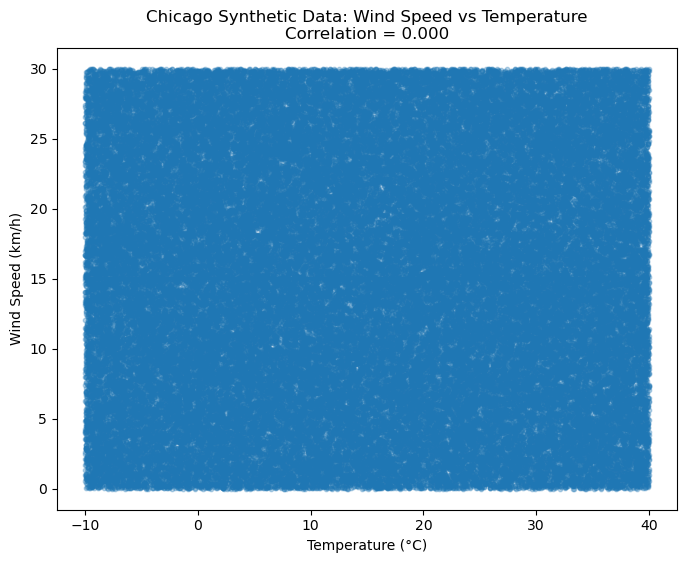

In [34]:
from scipy.stats import linregress

# Extract columns
temperature = train_data_chicago["Temperature_C"]
wind_speed = train_data_chicago["Wind_Speed_kmh"]

# Calculate correlation
corr_value = train_data_chicago[["Temperature_C", "Wind_Speed_kmh"]].corr().iloc[0,1]
print("Correlation (Temperature vs Wind Speed):", corr_value)

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(temperature, wind_speed, alpha=0.3, s=10)
plt.xlabel("Temperature (°C)")
plt.ylabel("Wind Speed (km/h)")
plt.title(f"Chicago Synthetic Data: Wind Speed vs Temperature\nCorrelation = {corr_value:.3f}")

# Add trendline
slope, intercept, r_value, p_value, std_err = linregress(temperature, wind_speed)
plt.plot(temperature, slope*temperature + intercept, lw=2)

plt.show()

In [35]:
# no visible correlation between temperature and wind speed

Correlation (Precipitation vs Humidity): 0.0009076696357421896


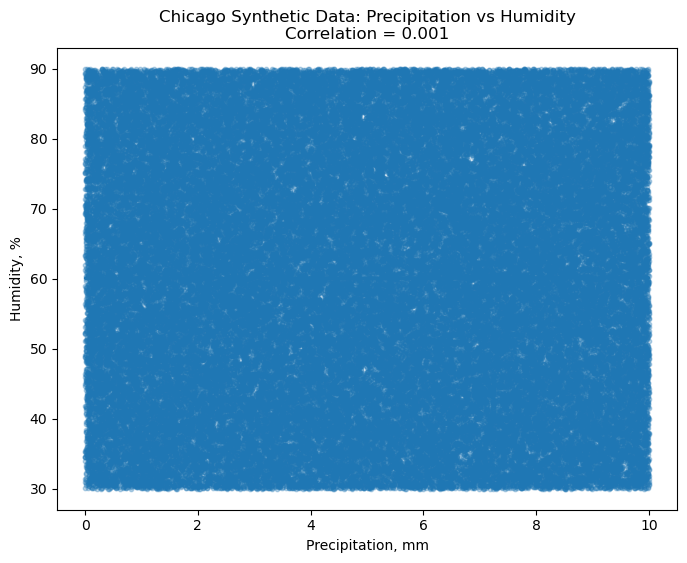

In [36]:
# Extract columns
precipitation = train_data_chicago["Precipitation_mm"]
humidity = train_data_chicago["Humidity_pct"]

# Calculate correlation
corr_value = train_data_chicago[["Precipitation_mm", "Humidity_pct"]].corr().iloc[0,1]
print("Correlation (Precipitation vs Humidity):", corr_value)

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(precipitation, humidity, alpha=0.3, s=10)
plt.xlabel("Precipitation, mm")
plt.ylabel("Humidity, %")
plt.title(f"Chicago Synthetic Data: Precipitation vs Humidity\nCorrelation = {corr_value:.3f}")

# Add trendline
slope, intercept, r_value, p_value, std_err = linregress(precipitation, humidity)
plt.plot(precipitation, slope*precipitation + intercept, lw=2)

plt.show()

In [37]:
# no visible correlation between precipitation and humidity

Correlation (Temperature vs Precipitation): -0.0009290553088904105


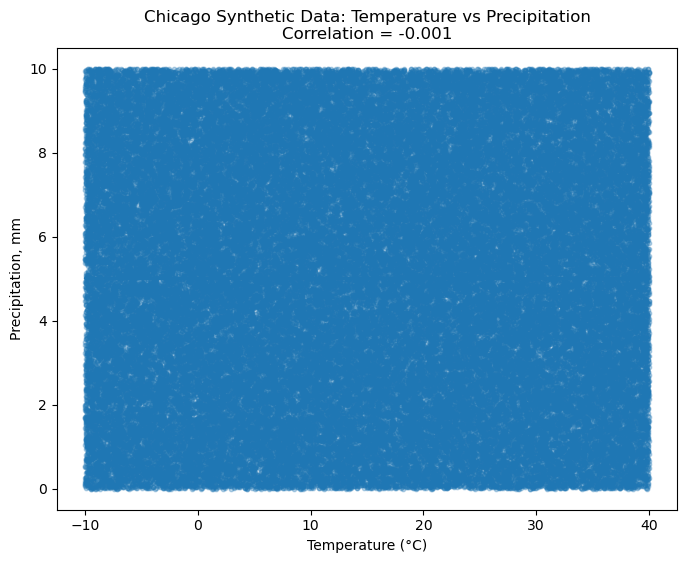

In [39]:
# Extract columns
temperature = train_data_chicago["Temperature_C"]
precipitation = train_data_chicago["Precipitation_mm"]

# Calculate correlation
corr_value = train_data_chicago[["Temperature_C", "Precipitation_mm"]].corr().iloc[0,1]
print("Correlation (Temperature vs Precipitation):", corr_value)

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(temperature, precipitation, alpha=0.3, s=10)
plt.xlabel("Temperature (°C)")
plt.ylabel("Precipitation, mm")
plt.title(f"Chicago Synthetic Data: Temperature vs Precipitation\nCorrelation = {corr_value:.3f}")

# Add trendline
slope, intercept, r_value, p_value, std_err = linregress(temperature, precipitation)
plt.plot(temperature, slope*temperature + intercept, lw=2)

plt.show()

In [40]:
# no visible correlation between temperature and precipitation

In [42]:
# now i need to evaluate, is temperature have some logical pattern during the day, so divide time to 4 parts: night, morning, day, evening

In [43]:
# Convert Time column into datetime.time (if it's string)
train_data_chicago['Time'] = pd.to_datetime(train_data_chicago['Time'], format="%H:%M:%S").dt.time

In [44]:
def get_part_of_day(t):
    hour = t.hour
    
    if 1 <= hour <= 6:
        return "Night"
    elif 7 <= hour <= 12:
        return "Morning"
    elif 13 <= hour <= 18:
        return "Day"
    else:
        # Evening includes 19-23 and 00
        return "Evening"

# Create new column
train_data_chicago['Part_of_Day'] = train_data_chicago['Time'].apply(get_part_of_day)

train_data_chicago.head()

,Location,Temperature_C,Humidity_pct,Precipitation_mm,Wind_Speed_kmh,Time,Year,Month,Day,Part_of_Day
0,Chicago,26.786811,31.513614,0.496024,22.980095,02:59:46,2024,1,6,Night
1,Chicago,17.587820,32.817923,0.128803,0.234146,00:07:29,2024,4,16,Evening
2,Chicago,-2.562660,30.356593,2.624328,2.601357,03:12:48,2024,4,1,Night
3,Chicago,7.166150,50.377273,4.669553,11.841165,12:07:38,2024,4,3,Morning
4,Chicago,38.386233,74.049712,6.792913,3.292467,13:22:42,2024,4,5,Day


In [45]:
# boxplot there range of temperature in each part of day

<Figure size 800x500 with 0 Axes>

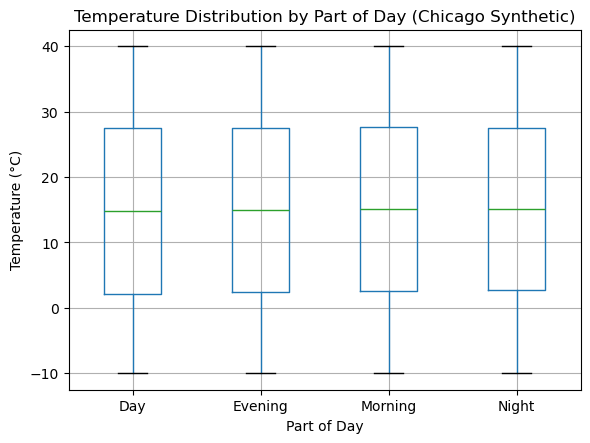

In [46]:
plt.figure(figsize=(8,5))
train_data_chicago.boxplot(column="Temperature_C", by="Part_of_Day")
plt.title("Temperature Distribution by Part of Day (Chicago Synthetic)")
plt.suptitle("")
plt.xlabel("Part of Day")
plt.ylabel("Temperature (°C)")
plt.show()


In [47]:
# no some logical patterns, lets check mean values

In [48]:
temp_by_part = train_data_chicago.groupby("Part_of_Day")["Temperature_C"].agg(["mean", "min", "max", "count"])
print(temp_by_part)


                  mean       min        max  count
Part_of_Day                                       
Day          14.900802 -9.999959  39.990803  24936
Evening      14.977197 -9.999896  39.998561  24866
Morning      15.072438 -9.993390  39.998200  25321
Night        15.085009 -9.998746  39.995211  25041


In [49]:
# dataset seems totally random without logical diurnal cycle patterns. Usually at night is more cold that at afternoon

# to conclusion I could say that this dataset might be useful for usual maching learning part of project, but using this dataset it is 
# impossible to learn some weather patterns and with this dataset I could achieve one of main goals of project